In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [2]:
dataset_path = r'index.csv'

In [3]:
rawData = pd.read_csv(dataset_path)
rawData

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,NaN,0.75,0.50,NaN,NaN,NaN,NaN
900,2017,1,1,NaN,0.75,0.50,0.65,NaN,4.8,2.3
901,2017,2,1,NaN,0.75,0.50,0.66,NaN,4.7,2.2
902,2017,3,1,NaN,0.75,0.50,NaN,NaN,NaN,NaN


In [4]:
rawData.isnull().sum()

# Looks like there are so many null values

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       442
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate    152
Real GDP (Percent Change)       654
Unemployment Rate               152
Inflation Rate                  194
dtype: int64

In [5]:
dataframe = rawData.fillna(method='ffill')

In [6]:
dataframe

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,4.6,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,4.6,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,8.0,5.3,NaN
...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,1.0,0.75,0.50,0.54,1.9,4.7,2.2
900,2017,1,1,1.0,0.75,0.50,0.65,1.9,4.8,2.3
901,2017,2,1,1.0,0.75,0.50,0.66,1.9,4.7,2.2
902,2017,3,1,1.0,0.75,0.50,0.66,1.9,4.7,2.2


In [7]:
dataframe.isnull().sum()
# Considerablly reduces the nulls

Year                              0
Month                             0
Day                               0
Federal Funds Target Rate       339
Federal Funds Upper Target      801
Federal Funds Lower Target      801
Effective Federal Funds Rate      0
Real GDP (Percent Change)         0
Unemployment Rate                 0
Inflation Rate                   42
dtype: int64

In [8]:
# Combining Year, Month and Day to from Date
dataframe['Date'] = ''
for index, row in dataframe.iterrows():
    dataframe['Date'][index] = str(dataframe['Year'][index])+"/"+str(dataframe['Month'][index])+"/"+str(dataframe['Day'][index])

In [9]:
dataframe["Date"] = pd.to_datetime(dataframe["Date"])
dataframe

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Date
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN,1954-07-01
1,1954,8,1,NaN,NaN,NaN,1.22,4.6,6.0,NaN,1954-08-01
2,1954,9,1,NaN,NaN,NaN,1.06,4.6,6.1,NaN,1954-09-01
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN,1954-10-01
4,1954,11,1,NaN,NaN,NaN,0.83,8.0,5.3,NaN,1954-11-01
...,...,...,...,...,...,...,...,...,...,...,...
899,2016,12,14,1.0,0.75,0.50,0.54,1.9,4.7,2.2,2016-12-14
900,2017,1,1,1.0,0.75,0.50,0.65,1.9,4.8,2.3,2017-01-01
901,2017,2,1,1.0,0.75,0.50,0.66,1.9,4.7,2.2,2017-02-01
902,2017,3,1,1.0,0.75,0.50,0.66,1.9,4.7,2.2,2017-03-01


<h1>

</h1>

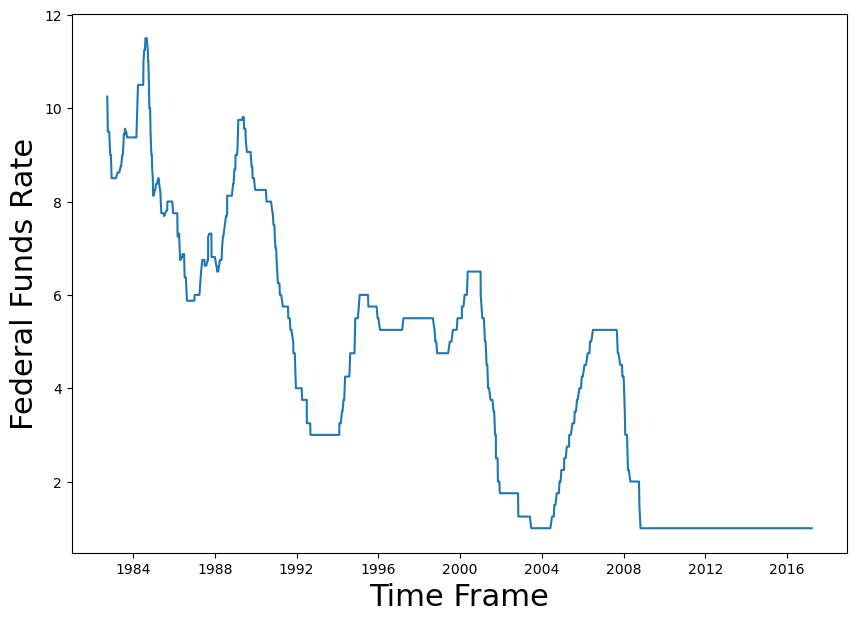

In [10]:
plt.figure(figsize=(10,7))
plt.plot(dataframe['Date'],dataframe['Federal Funds Target Rate'])
plt.xlabel("Time Frame",fontsize=22)
plt.ylabel("Federal Funds Rate",fontsize=22)
plt.show()
plt.close()

<h1>
In the above graph we see 4 major dips 
</h1>

<h2>
First is in the 1980's 
</h2>

<h2>
Second is in the start of 1990's 
</h2>

<h2>
Third is in the 2001
</h2>


<h2>
Fourth is in the 2008
</h2>

<h1> Now lets try to analyze the historical pattern in 2008 financial crisis  </h1

In [11]:
data_in_2007 = dataframe[((dataframe['Year']>=2007) & (dataframe['Year']<=2009))]
data_in_2007.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Date
768,2007,1,1,5.25,NaN,NaN,5.25,0.2,4.6,2.7,2007-01-01
769,2007,2,1,5.25,NaN,NaN,5.26,0.2,4.5,2.7,2007-02-01
770,2007,3,1,5.25,NaN,NaN,5.26,0.2,4.4,2.5,2007-03-01
771,2007,4,1,5.25,NaN,NaN,5.25,3.1,4.5,2.3,2007-04-01
772,2007,5,1,5.25,NaN,NaN,5.25,3.1,4.4,2.2,2007-05-01


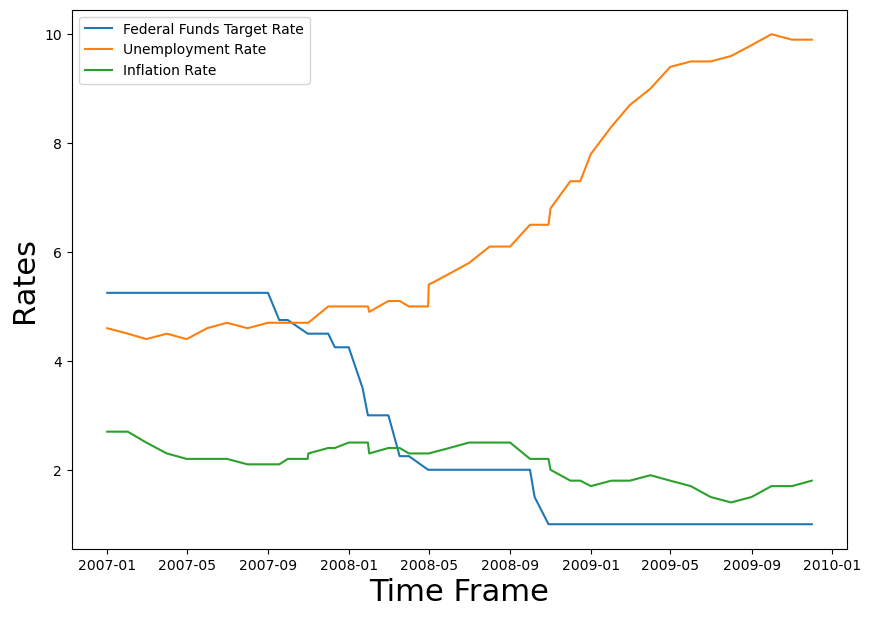

In [12]:
plt.figure(figsize=(10,7))
plt.plot(data_in_2007['Date'],data_in_2007['Federal Funds Target Rate'], label = 'Federal Funds Target Rate')
plt.plot(data_in_2007['Date'],data_in_2007['Unemployment Rate'], label ='Unemployment Rate')
plt.plot(data_in_2007['Date'],data_in_2007['Inflation Rate'], label = 'Inflation Rate')
plt.xlabel("Time Frame",fontsize=22)
plt.ylabel("Rates",fontsize=22)
plt.legend()
plt.show()
plt.close()

In the years leading up to the crisis, the Federal Reserve lowered interest rates to stimulate economic activity after the dot-com bubble burst in the early 2000s. The low-interest rates encouraged borrowing and contributed to the housing bubble.

The financial crisis led to a severe recession, causing businesses to cut jobs to cope with declining demand and financial difficulties. The unemployment rate surged as a result.


The crisis initially led to deflationary pressures as asset prices, particularly housing, collapsed. However, central banks, including the Federal Reserve, implemented aggressive monetary policies to combat deflation and stimulate economic activity.

<h1> Over all comparision of the relationships between Federal Funds Target Rate, Inflation Rate, and Unemployment Rate </h1>

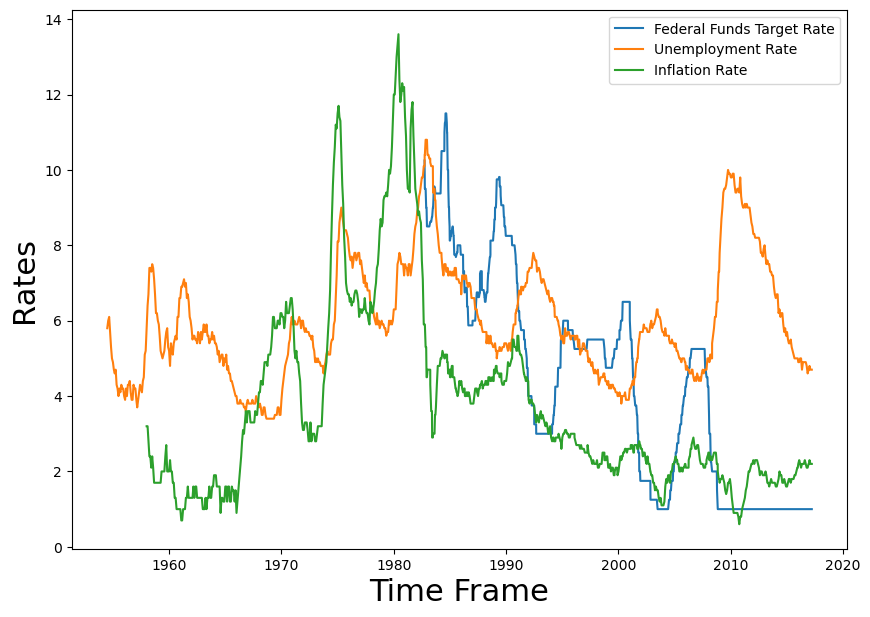

In [13]:
plt.figure(figsize=(10,7))
plt.plot(dataframe['Date'],dataframe['Federal Funds Target Rate'], label = 'Federal Funds Target Rate')
plt.plot(dataframe['Date'],dataframe['Unemployment Rate'], label ='Unemployment Rate')
plt.plot(dataframe['Date'],dataframe['Inflation Rate'], label = 'Inflation Rate')
plt.xlabel("Time Frame",fontsize=22)
plt.ylabel("Rates",fontsize=22)
plt.legend()
plt.show()
plt.close()

Federal Funds Target Rate:

Federal Funds Target Rate peaked in the early 1980s. In the 1990s and early 2000s, there was a period of relatively low-interest rates, which contributed to economic expansion but also played a role in the housing bubble that led to the 2008 financial crisis. Post-crisis, rates remained exceptionally low for an extended period to stimulate economic recovery.



Unemployment Rate:

The unemployment rate has varied over the decades. In the 1960s, it was generally low. The 1970s saw an increase, driven by factors like oil price shocks and economic recessions. The 1980s witnessed efforts to combat inflation, leading to a temporary rise in unemployment. The 1990s and early 2000s were marked by relatively low unemployment, but the 2008 financial crisis caused a significant spike in joblessness. Post-crisis, there was a gradual improvement in the labor market.


Inflation Rate:

Inflation in the 1960s and early 1970s was relatively moderate. However, the 1970s experienced high inflation due to factors like oil price shocks. The 1980s saw a deliberate effort by central banks to bring down inflation, which was largely successful. In the 1990s and early 2000s, inflation remained relatively low. The 2008 financial crisis initially led to deflationary pressures, but central banks implemented measures to prevent prolonged deflation.

<h1>Models to forecast Interest, Inflation, and
Unemployment rates</h1>

<h2>Linear Regression</h2>

In [26]:
lrData = dataframe.drop(['Year', 'Month', 'Day'], axis=1)
for i,r in lrData.iterrows():
    print(i,r)
#Federal Funds Target Rate is null till 339 

0 Federal Funds Target Rate                       NaN
Federal Funds Upper Target                      NaN
Federal Funds Lower Target                      NaN
Effective Federal Funds Rate                    0.8
Real GDP (Percent Change)                       4.6
Unemployment Rate                               5.8
Inflation Rate                                  NaN
Date                            1954-07-01 00:00:00
Name: 0, dtype: object
1 Federal Funds Target Rate                       NaN
Federal Funds Upper Target                      NaN
Federal Funds Lower Target                      NaN
Effective Federal Funds Rate                   1.22
Real GDP (Percent Change)                       4.6
Unemployment Rate                               6.0
Inflation Rate                                  NaN
Date                            1954-08-01 00:00:00
Name: 1, dtype: object
2 Federal Funds Target Rate                       NaN
Federal Funds Upper Target                      NaN
Federal Fund

808 Federal Funds Target Rate                       1.0
Federal Funds Upper Target                     0.25
Federal Funds Lower Target                      0.0
Effective Federal Funds Rate                   0.16
Real GDP (Percent Change)                       1.3
Unemployment Rate                               9.5
Inflation Rate                                  1.5
Date                            2009-07-01 00:00:00
Name: 808, dtype: object
809 Federal Funds Target Rate                       1.0
Federal Funds Upper Target                     0.25
Federal Funds Lower Target                      0.0
Effective Federal Funds Rate                   0.16
Real GDP (Percent Change)                       1.3
Unemployment Rate                               9.6
Inflation Rate                                  1.4
Date                            2009-08-01 00:00:00
Name: 809, dtype: object
810 Federal Funds Target Rate                       1.0
Federal Funds Upper Target                     0.25
Fe

In [15]:
# lrData.set_index('Date', inplace=True)

In [29]:
lrData = lrData.fillna(lrData.mean())
lrData

lrData['Time'] = np.arange(len(lrData.index))

# X = lrData.drop(['Federal Funds Target Rate', 'Federal Funds Upper Target', 'Federal Funds Lower Target'], axis=1)
X = lrData['Date']
y = lrData['Federal Funds Target Rate']
lrData

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Date,Time
0,4.809181,0.308252,0.058252,0.80,4.6,5.8,3.710209,1954-07-01,0
1,4.809181,0.308252,0.058252,1.22,4.6,6.0,3.710209,1954-08-01,1
2,4.809181,0.308252,0.058252,1.06,4.6,6.1,3.710209,1954-09-01,2
3,4.809181,0.308252,0.058252,0.85,8.0,5.7,3.710209,1954-10-01,3
4,4.809181,0.308252,0.058252,0.83,8.0,5.3,3.710209,1954-11-01,4
...,...,...,...,...,...,...,...,...,...
899,1.000000,0.750000,0.500000,0.54,1.9,4.7,2.200000,2016-12-14,899
900,1.000000,0.750000,0.500000,0.65,1.9,4.8,2.300000,2017-01-01,900
901,1.000000,0.750000,0.500000,0.66,1.9,4.7,2.200000,2017-02-01,901
902,1.000000,0.750000,0.500000,0.66,1.9,4.7,2.200000,2017-03-01,902


In [30]:
X

0     1954-07-01
1     1954-08-01
2     1954-09-01
3     1954-10-01
4     1954-11-01
         ...    
899   2016-12-14
900   2017-01-01
901   2017-02-01
902   2017-03-01
903   2017-03-16
Name: Date, Length: 904, dtype: datetime64[ns]

In [31]:
X = lrData.loc[:, ['Time']]
y = lrData.loc[:, 'Federal Funds Target Rate']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [35]:
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = pd.Series(model.predict(X_test), index=X_test.index)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.326003555520053


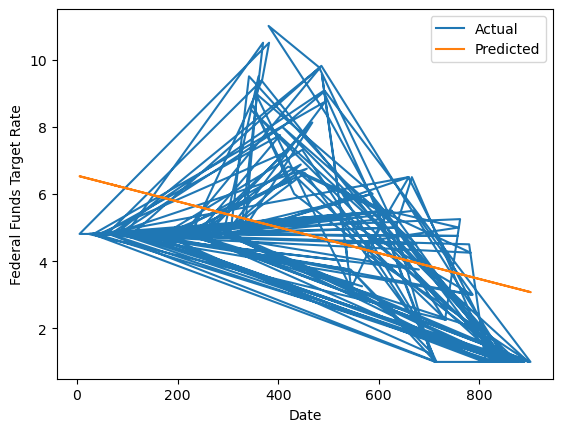

In [36]:
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Federal Funds Target Rate')
plt.legend()
plt.show()

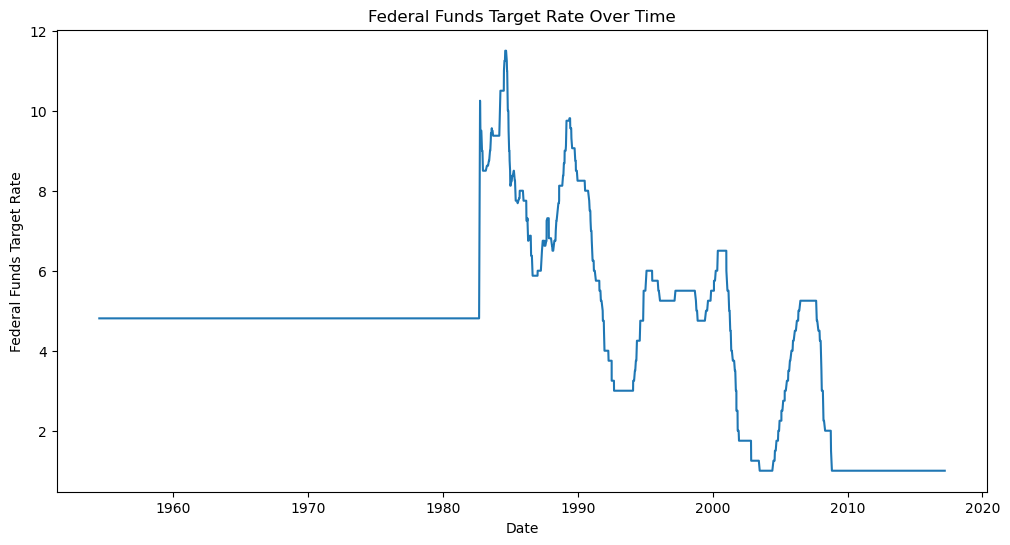

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load data and preprocess as mentioned in the previous response

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(lrData['Federal Funds Target Rate'])
plt.title('Federal Funds Target Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Federal Funds Target Rate')
plt.show()


In [ ]:
lrData.set_index('Date', inplace=True)

In [41]:
lrData

,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate,Time
Date,,,,,,,,
1954-07-01,4.809181,0.308252,0.058252,0.80,4.6,5.8,3.710209,0
1954-08-01,4.809181,0.308252,0.058252,1.22,4.6,6.0,3.710209,1
1954-09-01,4.809181,0.308252,0.058252,1.06,4.6,6.1,3.710209,2
1954-10-01,4.809181,0.308252,0.058252,0.85,8.0,5.7,3.710209,3
1954-11-01,4.809181,0.308252,0.058252,0.83,8.0,5.3,3.710209,4
...,...,...,...,...,...,...,...,...
2016-12-14,1.000000,0.750000,0.500000,0.54,1.9,4.7,2.200000,899
2017-01-01,1.000000,0.750000,0.500000,0.65,1.9,4.8,2.300000,900
2017-02-01,1.000000,0.750000,0.500000,0.66,1.9,4.7,2.200000,901


C:\Users\Patron\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Patron\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Patron\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


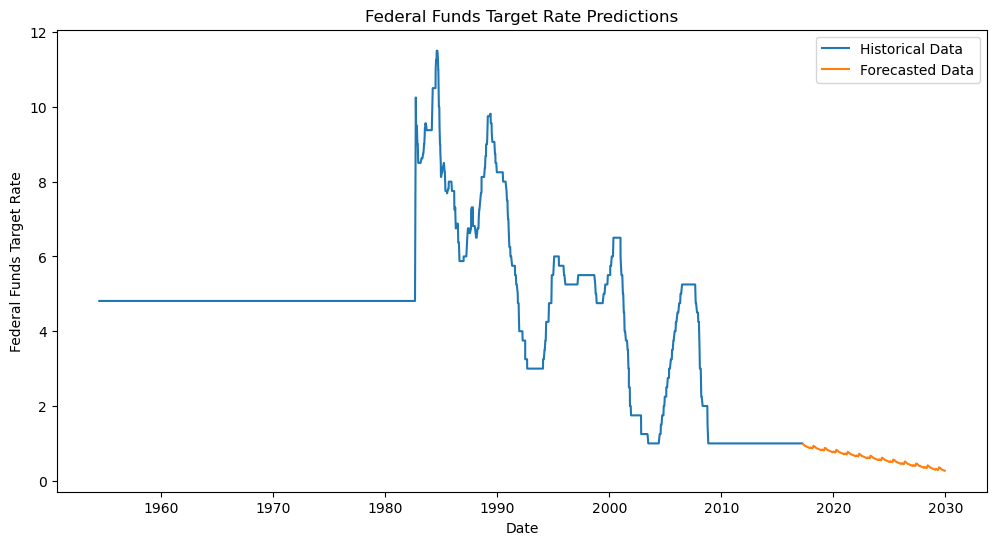

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime, timedelta


forecastFor = "Federal Funds Target Rate"

# Fit SARIMA model
sarima_model = SARIMAX(lrData[forecastFor], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

# Forecast future values
forecast_steps = 150  # Assuming monthly data for 10 years (120 months)
future_dates = [lrData.index[-1] + timedelta(days=31 * i) for i in range(1, forecast_steps + 1)]

future_forecast = sarima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.DatetimeIndex(future_dates)
forecast_series = pd.Series(future_forecast.predicted_mean.values, index=forecast_index)

# Visualize the forecast
plt.figure(figsize=(12, 6))
plt.plot(lrData[forecastFor], label='Historical Data')
plt.plot(forecast_series, label='Forecasted Data')
plt.title(forecastFor+" Predictions")
plt.xlabel('Date')
plt.ylabel(forecastFor)
plt.legend()
plt.show()
